In [97]:
import pandas as pd

In [98]:
#read file
marketing_analysis = pd.read_csv("/Users/mariasoriano/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")



In [99]:
#1. Show dataframe shape.
marketing_analysis.shape

(10910, 26)

In [100]:
#2. Standardize header names.
list(marketing_analysis.columns)

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [101]:
#The only header I see that may have trouble is the EmploymeStatus so I separate both words creating: Employment Status
marketing_analysis = marketing_analysis.rename(columns={'EmploymentStatus':'Employment Status'})
marketing_analysis.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [102]:
df = marketing_analysis.copy()

In [103]:
cols  = []
for col in df.columns:
    cols.append(col.lower())
df.columns = cols
print(df.columns)

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employment status', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employment status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [105]:
#2. Which columns are numerical?
df.select_dtypes(["number"])

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [106]:
#3. Which columns are categorical?
df.select_dtypes(["object"])

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [107]:
#5. Check and deal with NaN values.
df.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [108]:
df = df.dropna()

In [109]:
#6. Datetime format - Extract the months from the dataset and store in a separate column.
#Then filter the data to show only the information for the first quarter , ie. January, February and March.
#Hint: If data from March does not exist, consider only January and February.

#marketing_sales["months"] == marketing_sales[[""]]

df['effective to date'] = pd.to_datetime(df['effective to date'], errors='coerce')


In [110]:
df["month"] = df["effective to date"].dt.month

df = df[df["month"]<=3]

df["month"]

2        2
3        1
10       1
13       1
16       2
        ..
10902    1
10903    1
10904    2
10906    1
10908    2
Name: month, Length: 4543, dtype: int64

In [111]:
#marketing_analysis2 = marketing_analysis.copy()

In [112]:
def firstquarter(df):
    #return df[df['Month'].isin([1,2,3])]
    return df[df['month'] <= 3]

#marketing_analysis[marketing_analysis['Month'].isin([1,2,3])]

In [113]:
firstquarter(df)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [114]:
#BONUS
#How to make it all run as a function

#df = marketing_analysis.copy()
#def bonus(df):

#all the code

In [115]:
#then in a different cell
#bonus(marketing_analysis)

In [116]:
#read file
costumer_analysis = pd.read_csv("/Users/mariasoriano/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")




In [117]:
#Show DataFrame info
costumer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
#Show DataFrame info
costumer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [120]:
#Describe DataFrame.
costumer_analysis.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [121]:
#list(costumer_analysis.columns)

In [122]:
#costumer_analysis[["Response"]]

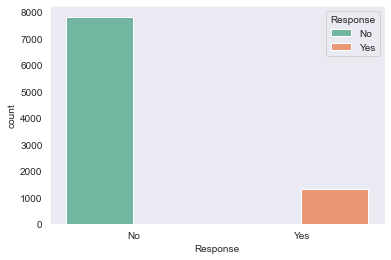

In [123]:
#Show a plot of the total number of responses.
#Using seaborn.countplot.
#Shows the counts of observations in each categorical bin using bars.
sns.set_style("dark")

#Vertical option
sns.countplot(x="Response", data=costumer_analysis, hue="Response", palette="Set2")
plt.show()

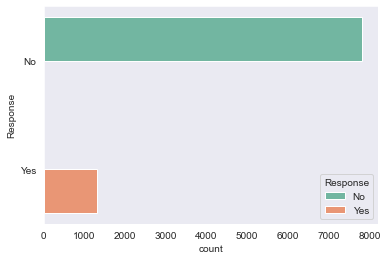

In [124]:
#Horizontal option
sns.countplot(y="Response", data=costumer_analysis, hue="Response", palette="Set2")
plt.show()

In [125]:
#costumer_analysis.info()

In [126]:
#Check what are the unique values inside Sales Channel
#costumer_analysis["Sales Channel"].unique()

In [127]:

#costumer_analysis.groupby(['Sales Channel']).count()

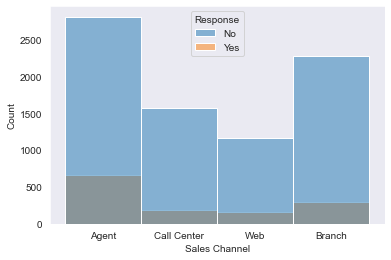

In [128]:
#Show a plot of the response rate by the sales channel.
#I FOUND 3 WAYS

#1.
sns.histplot(data=costumer_analysis, x='Sales Channel', hue='Response', multiple="layer")
plt.show()

<AxesSubplot:xlabel='Sales Channel', ylabel='Count'>

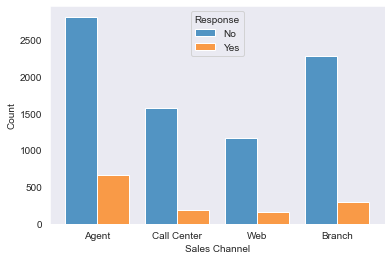

In [129]:
#THIS IS THE OPTION I LIKE THE MOST
sns.histplot(data=costumer_analysis, x="Sales Channel", hue="Response", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Response', ylabel='Count'>

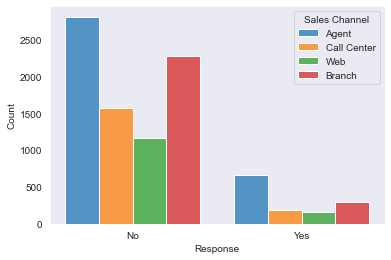

In [130]:
#I THINK THIS IS PRETTY UGLY
sns.histplot(data=costumer_analysis, x="Response", hue="Sales Channel", multiple="dodge", shrink=.8)


In [131]:
costumer_analysis["Total Claim Amount"] = costumer_analysis["Total Claim Amount"].round(decimals = 1)
costumer_analysis[["Response", "Total Claim Amount"]]


,Response,Total Claim Amount
0,No,384.8
1,No,1131.5
2,No,566.5
3,No,529.9
4,No,138.1
...,...,...
9129,No,198.2
9130,Yes,379.2
9131,No,790.8
9132,No,691.2


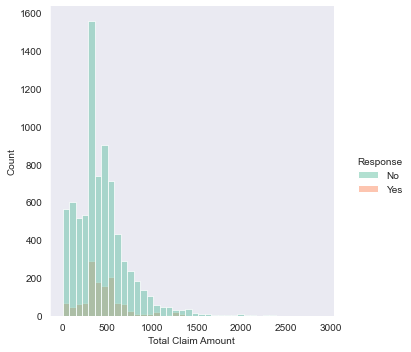

In [132]:
#Show a plot of the response rate by the total claim amount.
#I FOUND TWO WAYS using Seaborn
#this is the one I like the most
#bins = costumer_analysis["Total Claim Amount"].quantile([0, 20000, 40000, 60000, 80000, 100000]).to_list()

sns.displot(x='Total Claim Amount', hue = 'Response', data = costumer_analysis, bins = 40, palette="Set2")
plt.show()

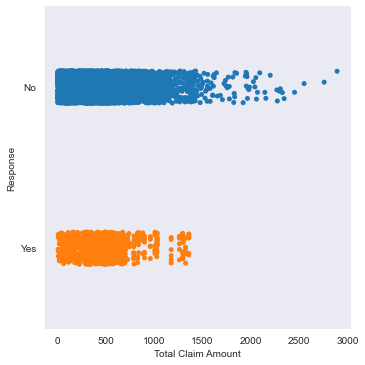

In [133]:
sns.catplot(x="Total Claim Amount", y="Response", data=costumer_analysis)
plt.show()

In [134]:

#low_income = costumer_analysis[costumer_analysis['Income']<=25000]

#medium_income = costumer_analysis[(costumer_analysis['Income']<25000) & (costumer_analysis["Income"]<= 45000)]

#high_income = costumer_analysis[costumer_analysis['Income']>=45000]


#filtered = data[data['income']<=0]

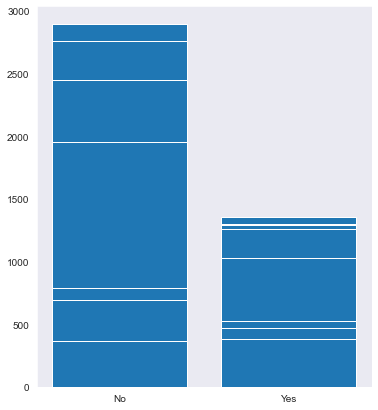

In [135]:
#Show a plot of the response rate by the total claim amount.
#THIS IS A SECOND OPTION USING MATPLOTLIB

#Using matplotlib
response_rate = costumer_analysis['Response']
total_claim = costumer_analysis['Total Claim Amount']
 
# Figure Size
fig = plt.figure(figsize =(6, 7))
 
# Horizontal Bar Plot
plt.bar(response_rate, total_claim)
 
# Show Plot
plt.show()

In [136]:
#at first I thought about droping all the 0 incomes but then I realized they are the ones who Response the most
#and that may be significant 

#costumer_analysis.drop(costumer_analysis.index[costumer_analysis['Income'] <= 0], inplace = True)

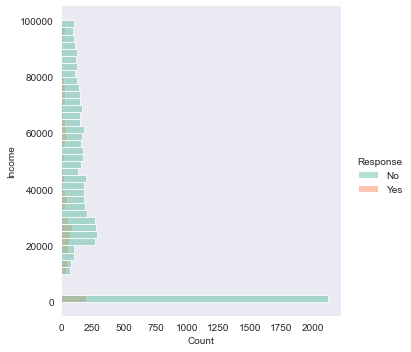

In [137]:
#Show a plot of the response rate by income.
#costumer_analysis['Income'] = pd.to_numeric(costumer_analysis['Income'], errors='coerce')
#costumer_analysis['Income'] = costumer_analysis['Income']>0
#costumer_analysis["Income"].min()
#costumer_analysis.info()
sns.displot(y='Income', hue = 'Response', data = costumer_analysis, bins = 40, palette="Set2")
plt.show()

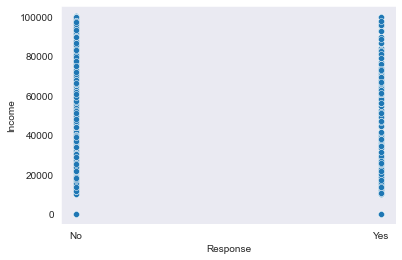

In [138]:
sns.scatterplot(data=costumer_analysis, x="Response", y="Income")
plt.show()

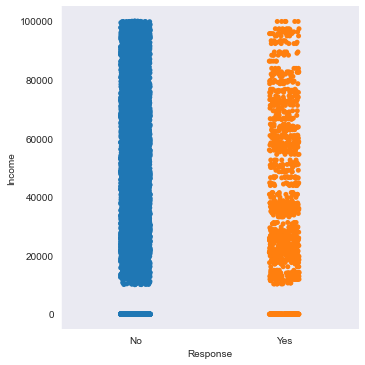

In [139]:
sns.catplot(x="Response", y="Income", data=costumer_analysis)
plt.show()

In [140]:
#I wanted to try this but the Jupyter Notebook doesn't work...

#sns.displot(y='Total Claim Amount', hue = 'Income', data = costumer_analysis, bins = 40, palette="Set2")
#plt.show()

# Lab costumer analysis round 4
### Lab 4 starts here

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [141]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [142]:
#Check the data types of the columns
costumer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [143]:
#Get numerical and categorical
numerical = costumer_analysis.select_dtypes(include=np.number)

categorical = costumer_analysis.select_dtypes(include=np.object)


### Now we will try to check the normality of the numerical variables visually.

- Use seaborn library to construct distribution plots for the numerical variables.

- Use Matplotlib to construct histograms.

- Do the distributions for different numerical variables look like a normal distribution.

I am adding here some resources I found.
- More info about subplots: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
- More info about axis and grids: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

## Using Seaborn library to construct distribution plots.
### (only numerical variables)

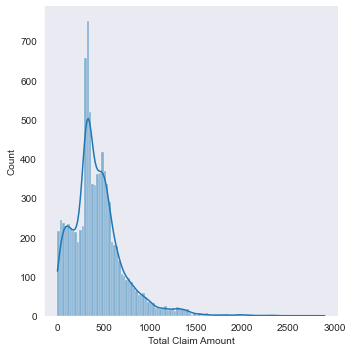

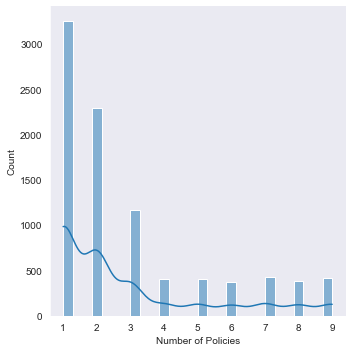

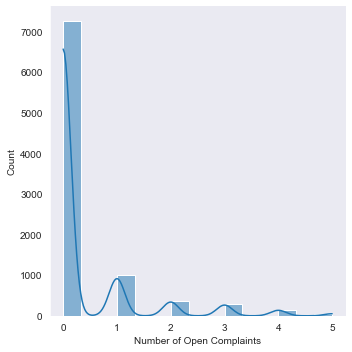

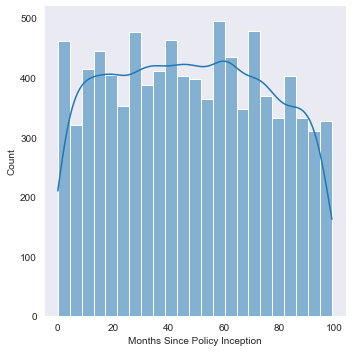

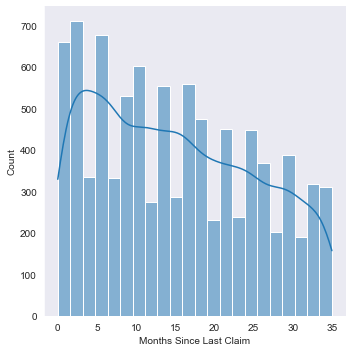

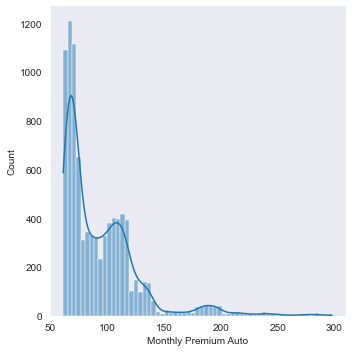

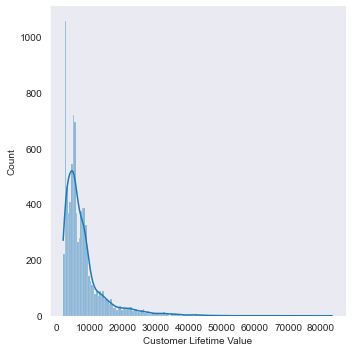

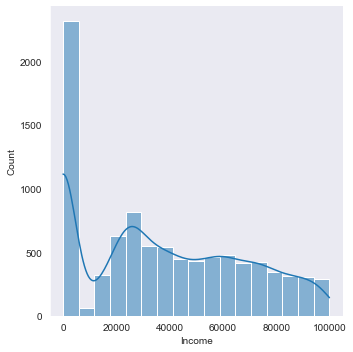

In [144]:
#fig, ax = plt.subplots(2,4, figsize=(15,10))
#fig, ax = plt.subplots(2,4)

sns.displot(costumer_analysis["Total Claim Amount"], kde=True)
sns.displot(costumer_analysis["Number of Policies"], kde=True)
sns.displot(costumer_analysis["Number of Open Complaints"], kde=True)
sns.displot(costumer_analysis["Months Since Policy Inception"], kde=True)
sns.displot(costumer_analysis["Months Since Last Claim"], kde=True)
sns.displot(costumer_analysis["Monthly Premium Auto"], kde=True)
sns.displot(costumer_analysis["Customer Lifetime Value"], kde=True)
sns.displot(costumer_analysis["Income"], kde=True)


plt.show()

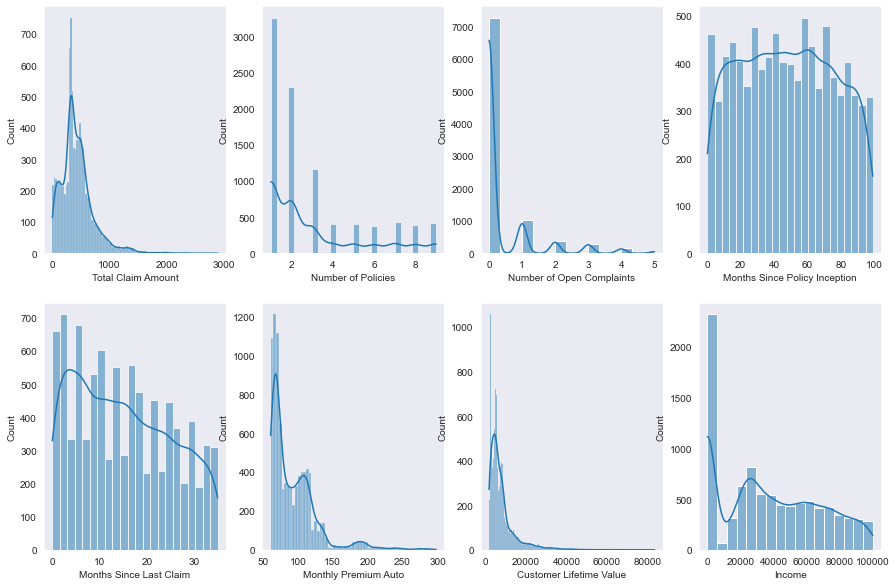

In [145]:
 fig, ax = plt.subplots(2,4, figsize=(15,10)) # ax is a numpy array

#sns.histplot(costumer_analysis["Total Claim Amount"], kde=True, ax = ax[0,0]);
sns.histplot(costumer_analysis["Total Claim Amount"], kde=True, ax = ax[0,0]);
sns.histplot(costumer_analysis["Number of Policies"], kde=True, ax = ax[0,1]);
sns.histplot(costumer_analysis["Number of Open Complaints"], kde=True, ax = ax[0,2]);
sns.histplot(costumer_analysis["Months Since Policy Inception"], kde=True, ax = ax[0,3]);
sns.histplot(costumer_analysis["Months Since Last Claim"], kde=True, ax = ax[1,0]);
sns.histplot(costumer_analysis["Monthly Premium Auto"], kde=True, ax = ax[1,1]);
sns.histplot(costumer_analysis["Customer Lifetime Value"], kde=True, ax = ax[1,2]);
sns.histplot(costumer_analysis["Income"], kde=True, ax = ax[1,3]);

In [146]:
my_list=[[1,2,3,4],[5,6,7,8]]
my_list[1][2]

7

In [147]:
my_array = np.array([[1,2,3,4],[5,6,7,8]])
my_array[1,2]

7

In [148]:
#fig, ax = plt.subplots(1,df.shape[1],figsize=(2,4))
#for i,col in enumerate(df.columns): # enumerate(<iterable>)-> index, value
   # sns.plot(x=col,data= df,ax=ax[i])
    

## How to define functions to clean parts of the code and put them together.

In [149]:
def filterquater(df):
    return new_df

def bonus(df):
    df2 = filterquater(df)
    return output2

def funct2():
    funct1()
    def funct3():
        return output
    return output

def clean_cols1_3(df):
    return df_clean

def clean_cols4_7(df):
    return df_clean

df_clean = clean_cols4_7(df)
print(df_clean)

def all_clean(df)
    df = clean_cols1_3(df)
    df = clean_cols4_7(df)
    return df

SyntaxError: invalid syntax (<ipython-input-149-4630bf13aae7>, line 23)

In [ ]:
my_list2 = [1,2,3,4]
for index, value in enumerate(my_list2):
    print("The index is {} and the value is {}".format(index,value))

In [ ]:
#Tried another way to arrange the plots to see them better but didn't work
#g = sns.PairGrid(df_numerical, hue="Income", diag_sharey=False, height=1.5, aspect=2)
#g.map(sns.histplot)

In [ ]:
#g = sns.FacetGrid(costumer_analysis)
#g.map(sns.histplot, "Income");
#g.map(sns.histplot, "Total Amount Claim");

## Using Matplotlib to construct histograms.

### (only numerical values)

canvas = fig
axis = ax. which is a np.array that will contain as many elements as plots you want to display in the figure.

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(15,10))

fig.suptitle('Numerical variables using Matplotlib')

ax[0,0].set_title('Income')
ax[0,0].hist(costumer_analysis['Income'])
ax[0,1].set_title('Customer Lifetime Value')
ax[0,1].hist(costumer_analysis['Customer Lifetime Value'])
ax[0,2].set_title('Total Claim Amount')
ax[0,2].hist(costumer_analysis['Total Claim Amount'])
ax[0,3].set_title('Months Since Last Claim')
ax[0,3].hist(costumer_analysis['Months Since Last Claim'])
ax[1,0].set_title('Number of Open Complaints')
ax[1,0].hist(costumer_analysis['Number of Open Complaints'])
ax[1,1].set_title('Number of Policies')
ax[1,1].hist(costumer_analysis['Number of Policies'])
ax[1,2].set_title('Months Since Las Claim')
ax[1,2].hist(costumer_analysis['Months Since Last Claim'])
ax[1,3].set_title('Months Since Policy Inception')
ax[1,3].hist(costumer_analysis['Months Since Policy Inception'])
plt.show()

## Do the distributions for different numerical variables look like a normal distribution?
Nope.

## Now we are going to check the multicollinearity between the features.
Will use the column **total_claim_amount** later as the target variable.*

In order to check multicorrelations I'm going to create a **heatmap** to show.

### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
correlations_matrix = numerical.corr()
sns.heatmap(round(correlations_matrix.corr(), 2), annot=True)
plt.show()

## LabRound 5 starts here
# Processing Data
### X-y split

In [ ]:
#costumer_analysis is already loaded
costumer_analysis.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Ok, let's not set "y" and "X":
- "y" for the column that we want to predict.
- "X" for the column that we want to use to make the predictions.

In [154]:
#At first I tried to display them together this way to have an idea...

#sns.scatterplot(x='Income',y='Total Claim Amount',data=costumer_analysis)
#plt.show()

In [155]:
y = numerical['Total Claim Amount']
x = numerical.drop(['Total Claim Amount'], axis=1)

In [156]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Normalize (numerical)

In [157]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(x) #obtain minmax
x_normalized = transformer.transform(x) #apply 
print(x_normalized.shape)
#switch back to a dataframe
x_normalized = pd.DataFrame(x_normalized, columns=x.columns)
x_normalized

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [158]:
sns.__version__

'0.11.0'

# Lab 6 Starts here

## OneHotEncoding - Processing Categorical Data



In [185]:
display(categorical)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [213]:
#categorical['Effective To Date'] = pd.to_datetime(categorical['Effective To Date'], errors='coerce')


In [214]:
cat_cols = categorical.drop(['Coverage', 'Education', 'Policy Type', 'Policy', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size'], axis = 1)
display(cat_cols)

,Customer,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Sales Channel
0,BU79786,Washington,No,Employed,F,Suburban,Married,Agent
1,QZ44356,Arizona,No,Unemployed,F,Suburban,Single,Agent
2,AI49188,Nevada,No,Employed,F,Suburban,Married,Agent
3,WW63253,California,No,Unemployed,M,Suburban,Married,Call Center
4,HB64268,Washington,No,Employed,M,Rural,Single,Agent
...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Employed,M,Urban,Married,Web
9130,PK87824,California,Yes,Employed,F,Suburban,Divorced,Branch
9131,TD14365,California,No,Unemployed,M,Suburban,Single,Branch
9132,UP19263,California,No,Employed,M,Suburban,Married,Branch


In [215]:

encoder = OneHotEncoder().fit(categorical[['Gender']])
gender_encoded = encoder.transform(categorical[['Gender']]).toarray()
gender_encoded

onehot_gender = pd.DataFrame(gender_encoded,columns=encoder.categories_)
onehot_gender = onehot_gender.drop(['M'],axis=1)
onehot_gender.head()



,F
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [216]:

encoder = OneHotEncoder().fit(categorical[['Marital Status']])
encoded_for_mstatus = encoder.transform(categorical[['Marital Status']]).toarray()
encoded_for_mstatus

onehot_mstatus = pd.DataFrame(encoded_for_mstatus,columns=encoder.categories_)
onehot_mstatus = onehot_mstatus.drop(['Divorced'],axis=1)
onehot_mstatus.head()

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [217]:
encoder = OneHotEncoder().fit(categorical[['State']])
state_encoded = encoder.transform(categorical[['State']]).toarray()
state_encoded

onehot_state = pd.DataFrame(state_encoded,columns=encoder.categories_)
onehot_state = onehot_state.drop(['California'],axis=1)
onehot_state.head()


,Arizona,Nevada,Oregon,Washington
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [218]:
encoder = OneHotEncoder().fit(categorical[['EmploymentStatus']])
state_employmentstat = encoder.transform(categorical[['EmploymentStatus']]).toarray()
state_employmentstat

onehot_employmentstat = pd.DataFrame(state_encoded,columns=encoder.categories_)
onehot_employmentstat = onehot_employmentstat.drop(['Retired'],axis=1)
onehot_employmentstat.head()

,Disabled,Employed,Medical Leave,Unemployed
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [219]:
encoder = OneHotEncoder().fit(categorical[['Renew Offer Type']])
offertype_encoded = encoder.transform(categorical[['Renew Offer Type']]).toarray()
offertype_encoded

onehot_offertype = pd.DataFrame(offertype_encoded,columns=encoder.categories_)
onehot_offertype = onehot_offertype.drop(['Offer4'],axis=1)
onehot_offertype.head()

,Offer1,Offer2,Offer3
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [238]:
encoder = OneHotEncoder().fit(categorical[['Sales Channel']])
salesc_encoded = encoder.transform(categorical[['Sales Channel']]).toarray()
salesc_encoded

onehot_salesc = pd.DataFrame(salesc_encoded,columns=encoder.categories_)
onehot_salesc = onehot_salesc.drop(['Call Center'],axis=1)
onehot_salesc.head()

,Agent,Branch,Web
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [239]:
encoder = OneHotEncoder().fit(categorical[['Location Code']])
location_encoded = encoder.transform(categorical[['Location Code']]).toarray()
location_encoded

onehot_location = pd.DataFrame(location_encoded,columns=encoder.categories_)
onehot_location = onehot_location.drop(['Rural'],axis=1)
onehot_location.head()

,Suburban,Urban
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0


In [283]:
encoder = OneHotEncoder().fit(categorical[['Coverage']])
coverage_encoded = encoder.transform(categorical[['Coverage']]).toarray()
coverage_encoded

onehot_coverage = pd.DataFrame(coverage_encoded,columns=encoder.categories_)
onehot_coverage = onehot_coverage.drop(['Basic'],axis=1)
onehot_coverage.head()

,Extended,Premium
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [284]:
encoder = OneHotEncoder().fit(categorical[['Education']])
education_encoded = encoder.transform(categorical[['Education']]).toarray()
education_encoded

onehot_education = pd.DataFrame(education_encoded,columns=encoder.categories_)
onehot_education = onehot_education.drop(['Doctor'],axis=1)
onehot_education.head()

,Bachelor,College,High School or Below,Master
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


For the type of **Coverage** I'm going to use the **Ordinal Encoder** because the order matters.

# Train Test Split


In [300]:
#concat all the normalized + Offer Type
x_clean = pd.concat([x_normalized, onehot_offertype], axis=1)
x_clean


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Offer1,)","(Offer2,)","(Offer3,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.0,1.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.0,0.0,1.0


In [294]:
#Choosing y and x for the train-test split
y = numerical['Total Claim Amount']
x = x_clean

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1233) 


display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7307, 10)

(1827, 10)

(7307,)

(1827,)

# Apply Linear Regresion

In [295]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

# Model Validation

## R2_score

In [296]:
from sklearn.metrics import r2_score

predict = lm.predict(x_test)
r2_score(y_test, predict)

0.520632292469873

## MSE (Median Squared Error)

In [297]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predict)
MSE

40980.317533253154

## RMSE

In [298]:
RMSE = np.sqrt(MSE)
RMSE

202.43595909139552

## MAE

In [299]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, predict)
MAE

142.9082775289448